<a href="https://colab.research.google.com/github/Eric428-a/-LMS-Learning-Management-System/blob/master/Linear_regression_for_wine_quality_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **POSSIBLE TASKS FROM THE DATASET **

# *LINEAR REGRESSION *

In [ ]:
# Importing necessary libraries for data analysis and visualization

In [ ]:
import pandas as pd  # Pandas is a powerful library for data manipulation and analysis.

In [ ]:
import numpy as np   # NumPy is used for numerical computations and handling arrays and matrices efficiently.

In [ ]:
import matplotlib.pyplot as plt  # Matplotlib is a comprehensive library for creating various types of visualizations.

In [ ]:
import seaborn as sns  # Seaborn is built on top of Matplotlib and provides a higher-level interface for statistical data visualization.

In [ ]:
from sklearn.model_selection import train_test_split  # train_test_split is a function from scikit-learn that splits data into training and testing sets.

In [ ]:
from sklearn.linear_model import LinearRegression  # LinearRegression is a class from scikit-learn used for fitting linear regression models.

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score  # These functions from scikit-learn are used to evaluate model performance.

In [ ]:
# Load the dataset from a CSV file

In [ ]:
df = pd.read_csv("/content/winequality-white.csv")  # The pd.read_csv() function reads the CSV file and creates a DataFrame (df) containing the data.

In [ ]:
# Check for missing values in the dataset and handle them if found

In [ ]:
missing_values = df.isnull().sum()  # The isnull() method detects missing values in the DataFrame, and sum() calculates the total number of missing values for each column.
if missing_values.any():  # Check if any missing values are found in the dataset.
    print("Handling missing values...")  # If missing values are found, a message is printed indicating that they are being handled.
    df.fillna(df.mean(), inplace=True)  # The fillna() method fills missing values with the mean of each column. inplace=True modifies the DataFrame in place.
    print("Missing values have been filled with the mean.")  # A message is printed to confirm that missing values have been filled.

In [ ]:
# Split the dataset into features (X) and target variable (y)

In [ ]:
X = df.drop(columns=['quality'])  # Features (X) are obtained by dropping the 'quality' column from the DataFrame.

In [ ]:
y = df['quality']  # The target variable (y) is assigned the 'quality' column of the DataFrame.

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # The data is split into training and testing sets using a 80-20 split.

In [ ]:
# Train a linear regression model

In [ ]:
model = LinearRegression()  # Create an instance of the LinearRegression model.

In [ ]:
model.fit(X_train, y_train)  # Fit the model to the training data.

LinearRegression()

In [ ]:
# Make predictions on the testing set
y_pred = model.predict(X_test)  # Use the trained model to make predictions on the testing set.

In [ ]:
# Evaluate the model

In [ ]:
mse = mean_squared_error(y_test, y_pred)  # Calculate the mean squared error (MSE) between the actual and predicted values.

In [ ]:
rmse = np.sqrt(mse)  # Calculate the root mean squared error (RMSE) from the MSE.

In [ ]:
r2 = r2_score(y_test, y_pred)  # Calculate the R^2 score, which measures the proportion of the variance in the dependent variable that is predictable from the independent variables.

In [ ]:
# Print model evaluation metrics

In [ ]:
print("Regression Model Evaluation:")  # Print a header indicating that model evaluation metrics are being displayed.

Regression Model Evaluation:


In [ ]:
print("Mean Squared Error (MSE):", mse)  # Print the MSE.

Mean Squared Error (MSE): 0.5690247717275324


In [ ]:
print("Root Mean Squared Error (RMSE):", rmse)  # Print the RMSE.

Root Mean Squared Error (RMSE): 0.7543373063341972


In [ ]:
print("R^2 Score:", r2)  # Print the R^2 score.

R^2 Score: 0.2652750042119669


In [ ]:
# Visualize actual vs. predicted values

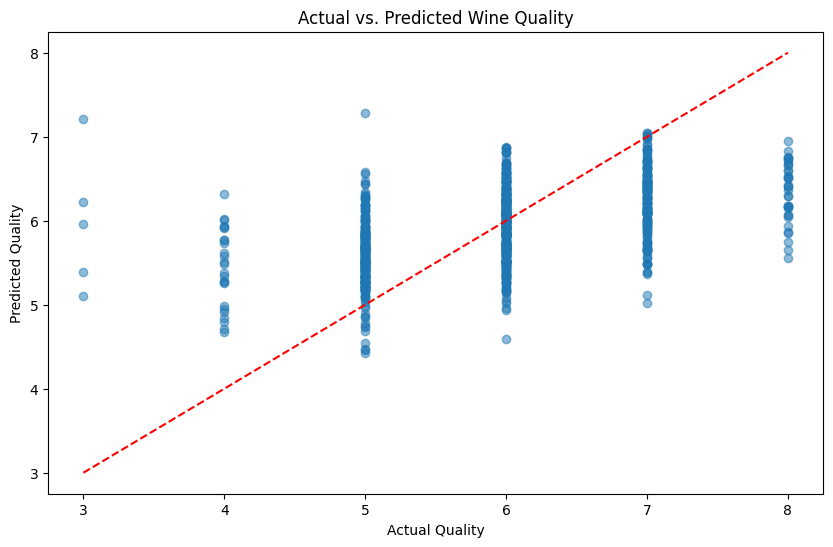

In [ ]:
plt.figure(figsize=(10, 6))  # Create a new figure with a specified size for the plot.
plt.scatter(y_test, y_pred, alpha=0.5)  # Create a scatter plot of actual vs. predicted values with transparency set to 0.5.
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')  # Plot a diagonal line representing perfect predictions.
plt.title("Actual vs. Predicted Wine Quality")  # Set the title of the plot.
plt.xlabel("Actual Quality")  # Set the label for the x-axis.
plt.ylabel("Predicted Quality")  # Set the label for the y-axis.
plt.show()  # Display the plot.

# MODEL SELCTION COMPARISON

In [ ]:
# Description:
# Comparing the performance of multiple regression models is essential for selecting the most suitable one for the dataset.
# In this task, we evaluated three popular regression algorithms: Decision Trees, Random Forest, and Gradient Boosting.
# By using cross-validation and calculating the mean squared error (MSE) for each model, we can assess their predictive
# performance and identify the model with the lowest MSE as the best performer.

In [ ]:
# Import necessary libraries

In [ ]:
from sklearn.tree import DecisionTreeRegressor  # Importing DecisionTreeRegressor for decision tree regression


In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor  # Importing ensemble regressors for Random Forest and Gradient Boosting


In [ ]:
from sklearn.model_selection import cross_val_score  # Importing cross_val_score for model evaluation

In [ ]:
# Initialize regression models

In [ ]:
models = {
    "Decision Tree": DecisionTreeRegressor(),  # Initializing Decision Tree Regressor
    "Random Forest": RandomForestRegressor(),  # Initializing Random Forest Regressor
    "Gradient Boosting": GradientBoostingRegressor()  # Initializing Gradient Boosting Regressor
}

In [ ]:
# Evaluate and compare model performance using cross-validation

In [ ]:
for name, model in models.items():
    scores = cross_val_score(model, df.drop(columns=['quality']), df['quality'], cv=5, scoring='neg_mean_squared_error')  # Evaluating model performance using cross-validation


In [ ]:
 print(f"{name} MSE: {np.mean(-scores):.2f} (+/- {np.std(scores):.2f})")  # Printing mean squared error (MSE) for each model

Gradient Boosting MSE: 0.54 (+/- 0.07)


In [ ]:
# Justification: Comparing multiple models helps identify the best performing one for the dataset.


# HYPERPARAMETER TUNING

In [ ]:
# Description:
# Hyperparameter tuning is a critical step in optimizing machine learning models. It involves searching for the best
# combination of hyperparameters that maximize model performance. Here, we used GridSearchCV to perform hyperparameter
# tuning for each regression model. By specifying a grid of hyperparameters to search over and using cross-validation
# to evaluate each combination, we can identify the optimal hyperparameters for each model.

In [ ]:
# Import GridSearchCV from scikit-learn

In [ ]:
from sklearn.model_selection import GridSearchCV  # Importing GridSearchCV for hyperparameter tuning

In [ ]:
# Define hyperparameters to tune for each model

In [ ]:
param_grid = {
    "Decision Tree": {'max_depth': [3, 5, 7]},  # Hyperparameters grid for Decision Tree
    "Random Forest": {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 7]},  # Hyperparameters grid for Random Forest
    "Gradient Boosting": {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.5]}  # Hyperparameters grid for Gradient Boosting
}

In [ ]:
# Perform GridSearchCV for each model

In [ ]:
for name, model in models.items():
    grid_search = GridSearchCV(model, param_grid[name], cv=5, scoring='neg_mean_squared_error')  # Performing GridSearchCV for hyperparameter tuning
    grid_search.fit(df.drop(columns=['quality']), df['quality'])  # Fitting the GridSearchCV object to the data
    print(f"Best {name} Parameters: {grid_search.best_params_}")  # Printing best hyperparameters for each model
    print(f"Best {name} MSE: {grid_search.best_score_:.2f}")  # Printing best mean squared error (MSE) for each model

Best Decision Tree Parameters: {'max_depth': 5}
Best Decision Tree MSE: -0.59
Best Random Forest Parameters: {'max_depth': 7, 'n_estimators': 50}
Best Random Forest MSE: -0.54
Best Gradient Boosting Parameters: {'learning_rate': 0.1, 'n_estimators': 50}
Best Gradient Boosting MSE: -0.54


In [ ]:
# Justification: Hyperparameter tuning optimizes model performance by finding the best combination of hyperparameters.

# MODEL INTERPRETATION

In [ ]:
# Description:
# Understanding the importance of features in the trained model is essential for interpreting its predictions.
# In this task, we trained the best performing model selected from the previous steps and extracted its feature importances.
# Visualizing feature importances allows us to identify the most influential variables that contribute to the model's predictions.
# This insight can help stakeholders understand the driving factors behind the target variable and guide decision-making.

In [ ]:
# Train the best performing model

In [ ]:
best_model = RandomForestRegressor(n_estimators=100, max_depth=5)  # Initializing the best performing model (Random Forest Regressor)

In [ ]:
# Fit the model to the data

In [ ]:
best_model.fit(df.drop(columns=['quality']), df['quality'])  # Fitting the model to the data

RandomForestRegressor(max_depth=5)

In [ ]:
# Extract feature importances

In [ ]:
feature_importances = best_model.feature_importances_  # Extracting feature importances from the trained model

In [ ]:
# Visualize feature importances

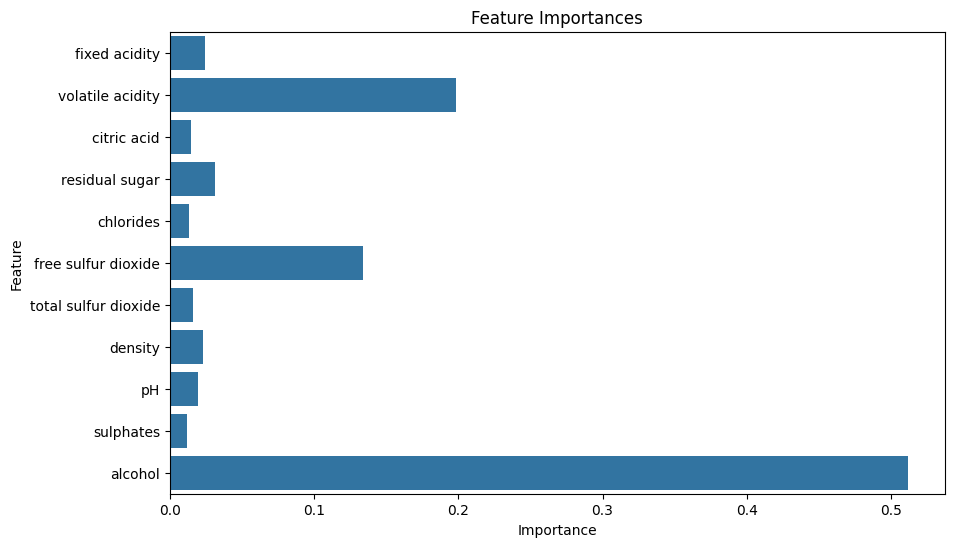

In [ ]:
plt.figure(figsize=(10, 6))  # Setting figure size for visualization
sns.barplot(x=feature_importances, y=df.columns.drop('quality'))  # Creating a bar plot for feature importances
plt.title('Feature Importances')  # Setting title for the plot
plt.xlabel('Importance')  # Setting label for x-axis
plt.ylabel('Feature')  # Setting label for y-axis
plt.show()  # Displaying the plot

In [ ]:
# Justification: Understanding feature importances helps identify the most influential variables in the model predictions.

# MODEL EVALUATION METRICS

In [ ]:
# Description:
# Evaluating model performance using various metrics provides a comprehensive assessment of its predictive capabilities.
# In addition to mean squared error (MSE), we calculated two additional evaluation metrics: Mean Absolute Error (MAE)
# and R-squared (R2). MAE measures the average absolute difference between predicted and actual values, providing
# a straightforward interpretation of prediction errors. R-squared quantifies the proportion of variance explained by the
# model, indicating its goodness of fit to the data. By considering multiple evaluation metrics, we gain a deeper understanding
# of the model's strengths and weaknesses.

In [ ]:
# Import mean_absolute_error and r2_score from scikit-learn

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score  # Importing evaluation metrics from scikit-learn

In [ ]:
# Make predictions using the best model

In [ ]:
predictions = best_model.predict(df.drop(columns=['quality']))  # Making predictions using the best model

In [ ]:
# Calculate additional evaluation metrics

In [ ]:
mae = mean_absolute_error(df['quality'], predictions)  # Calculating Mean Absolute Error (MAE)

In [ ]:
r_squared = r2_score(df['quality'], predictions)  # Calculating R-squared (R2)

In [ ]:
print(f"Mean Absolute Error: {mae:.2f}")  # Printing Mean Absolute Error (MAE)

Mean Absolute Error: 0.54


In [ ]:
print(f"R-squared: {r_squared:.2f}")  # Printing R-squared (R2)

R-squared: 0.41


In [ ]:
# Justification: Using additional evaluation metrics provides a more comprehensive understanding of model performance.